In [1]:
# required python libs
import json
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [32]:
def German_Credit_Data():
  """
  Load, encode, and transform German Credit Data from local storage to Google Colab.

  Args:
    None

  Returns:
    Pandas DataFrame with German Credit data
  """
  # data upload to Google Colab from local storage as CSV file type
  upload = files.upload()

  # define German Credit column names per documentation
  column_names = [
    "Chequing Account", "Duration", "Credit History", "Purpose",
    "Credit Amount", "Savings Account", "Employment Tenure", "Utilization",
    "Relationship Status", "Other Debtors", "Residence Tenure", "Property",
    "Age", "Outside Credit", "Housing", "Credit Products",
    "Job", "Responsibility", "Telephone", "Foreign Worker", "Target"
  ]
  # Responsibility
  # Responsibility

  # define German Credit ordinal variables
  ordinal_variables = {
    'Status of Existing Account': ['A11', 'A12', 'A13', 'A14'],
    'Credit History': ['A30', 'A31', 'A32', 'A33', 'A34'],
    'Savings Account': ['A61', 'A62', 'A63', 'A64', 'A65'],
    'Employment Tenure': ['A71', 'A72', 'A73', 'A74', 'A75'],
    'Utilization': [1, 2, 3, 4],
    'Residence Tenure': [1, 2, 3, 4]
  }


  # read German Credit data into DataFrame with Pandas python library
  # no header row on the original data file
  df = pd.read_csv('german.data', sep=' ', header=None, names=column_names)

  # update data types on German Credit (numeric to object)
  # change the 'Utilization' column to type object
  df['Utilization'] = df['Utilization'].astype('object')
  # change the 'Residence Tenure' column to type object
  df['Residence Tenure'] = df['Residence Tenure'].astype('object')
  # change the 'Responsibility' column to type object
  df['Responsibility'] = df['Responsibility'].astype('object')

  # Upload the metadata file
  uploaded = files.upload()  # This opens a file picker; select metadata.json

  # Load the metadata as a dict (assuming it's the only uploaded file or specify the filename)
  metadata_filename = list(uploaded.keys())[0]  # Or hardcode 'metadata.json'
  with open(metadata_filename, 'r') as f:
    metadata = json.load(f)

  print(metadata)  # Verify it loaded correctly

  # Combine
  df.attrs = metadata

  return df, metadata # Return both the dataframe and metadata

In [3]:
def plot_histogram(df, column_name):
    """
    Creates a histogram for a specified column in a DataFrame with labels.

    Parameters:
    df (pandas.DataFrame): Input DataFrame
    column_name (str): Name of the column to plot

    Returns:
    matplotlib.figure.Figure: The created histogram figure
    """
    # Input validation
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Input 'df' must be a pandas DataFrame")
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame")

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot histogram
    ax.hist(df[column_name].dropna(), bins='auto', edgecolor='black')

    # Set labels and title
    ax.set_xlabel(column_name)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column_name}')

    # Add grid for better readability
    ax.grid(True, alpha=0.3)
    plt.gca().set_axisbelow(True)  # Ensure grid lines are behind the plot

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    return fig

In [4]:
def plot_bar(df, variable_name):
    """
    Generate a bar plot for a discrete variable in a DataFrame with value labels.

    Parameters:
    df (pandas.DataFrame): Input DataFrame containing the variable.
    variable_name (str): Name of the column to plot (must be discrete/categorical).

    Returns:
    matplotlib.figure.Figure: Bar plot with labels.
    """
    # Check if variable exists in DataFrame
    if variable_name not in df.columns:
        raise ValueError(f"Column '{variable_name}' not found in DataFrame")

    # Get value counts for the discrete variable
    counts = df[variable_name].value_counts().sort_index()

    # Create bar plot
    plt.figure(figsize=(10, 6))
    bars = plt.bar(counts.index.astype(str), counts.values, edgecolor='black')

    # Add labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval),
                 ha='center', va='bottom', fontsize=10)

    # Add horizontal grid lines for readability
    plt.grid(True, axis='y', linestyle='--', alpha=0.7, zorder=0)
    plt.gca().set_axisbelow(True)  # Ensure grid lines are behind bars

    # Customize plot
    plt.xlabel(variable_name, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Bar Plot of {variable_name}', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    return plt.gcf()

In [29]:
def plot_pie(df, variable_name):
    """
    Generate a pie chart for a discrete variable in a DataFrame with percentage labels and a legend.
    If metadata is available in df.attrs[variable_name] with a 'categories' dictionary mapping categories
    to custom labels, the legend will use those custom labels; otherwise, it will use the category values as labels.

    Parameters:
    df (pandas.DataFrame): Input DataFrame containing the variable.
    variable_name (str): Name of the column to plot (must be discrete/categorical).

    Returns:
    matplotlib.figure.Figure: Pie chart with percentage labels and legend.
    """
    import matplotlib.pyplot as plt

    # Check if variable exists in DataFrame
    if variable_name not in df.columns:
        raise ValueError(f"Column '{variable_name}' not found in DataFrame")

    # Get value counts for the discrete variable
    counts = df[variable_name].value_counts()

    # Determine labels from metadata in df.attrs if available
    label_map = {}
    if hasattr(df, 'attrs') and variable_name in df.attrs:
        var_metadata = df.attrs[variable_name]
        if isinstance(var_metadata, dict) and 'categories' in var_metadata:
            label_map = var_metadata['categories']

    pie_labels = [str(label_map.get(cat, cat)) for cat in counts.index]

    # Create pie chart
    plt.figure(figsize=(10, 8))  # Wider figure to accommodate legend
    wedges, texts, autotexts = plt.pie(
        counts.values,
        labels=None,  # No labels on wedges to avoid clutter
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 10}
    )

    # Add legend using metadata labels if available
    plt.legend(
        wedges,
        pie_labels,
        title=variable_name,
        loc="center left",
        bbox_to_anchor=(1, 0.5, 0.5, 1),
        fontsize=10
    )

    # Customize plot
    plt.title(f'Pie Chart of {variable_name}', fontsize=14)
    plt.tight_layout()

    # Style percentage labels
    for autotext in autotexts:
        autotext.set_fontsize(10)
        autotext.set_color('black')
        autotext.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='black'))

    return plt.gcf()

In [5]:
def plot_box(df, variable_name):
    """
    Generate a box plot for a numerical variable in a DataFrame with grid lines.

    Parameters:
    df (pandas.DataFrame): Input DataFrame containing the variable.
    variable_name (str): Name of the column to plot (must be numerical).

    Returns:
    matplotlib.figure.Figure: Box plot with grid lines.
    """
    # Check if variable exists in DataFrame
    if variable_name not in df.columns:
        raise ValueError(f"Column '{variable_name}' not found in DataFrame")

    # Check if column is numerical
    if not pd.api.types.is_numeric_dtype(df[variable_name]):
        raise ValueError(f"Column '{variable_name}' must contain numerical data")

    # Create box plot
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[variable_name].dropna(), vert=True, patch_artist=True,
                boxprops=dict(edgecolor='black'),
                medianprops=dict(color='#2D2D2D'))

    # Add horizontal grid lines for readability
    plt.grid(True, axis='y', linestyle='--', alpha=0.7, zorder=0)
    plt.gca().set_axisbelow(True)  # Ensure grid lines are behind the plot

    # Customize plot
    plt.ylabel(variable_name, fontsize=12)
    plt.title(f'Box Plot of {variable_name}', fontsize=14)
    plt.xticks([1], [variable_name], fontsize=12)
    plt.tight_layout()

    return plt.gcf()

In [6]:
def plot_multiple_bars(df, column_names):
    """
    Loop through a list of column names and display bar plots for each using plot_bar.

    Parameters:
    df (pandas.DataFrame): Input DataFrame containing the columns.
    column_names (list): List of column names to plot (must be discrete/categorical).
    """
    # Check if all columns exist in DataFrame
    missing_cols = [col for col in column_names if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Columns {missing_cols} not found in DataFrame")

    # Loop through each column and display the plot
    for col in column_names:
        plot_bar(df, col)
        plt.show()

In [27]:
def plot_multiple_pies(df, column_names):
    """
    Loop through a list of column names and display pie charts for each using plot_pie.

    Parameters:
    df (pandas.DataFrame): Input DataFrame containing the columns.
    column_names (list): List of column names to plot (must be discrete/categorical).
    """
    import matplotlib.pyplot as plt

    # Check if all columns exist in DataFrame
    missing_cols = [col for col in column_names if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Columns {missing_cols} not found in DataFrame")

    # Loop through each column and display the plot
    for col in column_names:
        plot_pie(df, col)
        plt.show()

In [31]:
def plot_stacked_bar(df, x_column, stack_column):
    """
    Generate a stacked bar plot for two categorical variables in a DataFrame.

    Parameters:
    df (pandas.DataFrame): Input DataFrame containing the variables.
    x_column (str): Name of the column for the x-axis (categorical).
    stack_column (str): Name of the column for stacking (categorical).

    Returns:
    matplotlib.figure.Figure: Stacked bar plot with specified styling.
    """
    # Input validation
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Input 'df' must be a pandas DataFrame")
    if x_column not in df.columns:
        raise ValueError(f"Column '{x_column}' not found in DataFrame")
    if stack_column not in df.columns:
        raise ValueError(f"Column '{stack_column}' not found in DataFrame")

    # Compute crosstab for counts
    crosstab = pd.crosstab(df[x_column], df[stack_column])

    # Default labels and title
    x_labels = crosstab.index.astype(str)
    stack_labels = crosstab.columns.astype(str)
    title = f'Stacked Bar Plot of {x_column} by {stack_column}'
    xlabel = x_column
    legend_title = stack_column

    # Use metadata if available
    if hasattr(df, 'attrs'):
        # For x_column
        if x_column in df.attrs:
            meta_x = df.attrs[x_column]
            if 'description' in meta_x:
                title = f'Stacked Bar Plot of {meta_x["description"]} by '
                xlabel = meta_x['description']
            if 'categories' in meta_x:
                x_labels = [meta_x['categories'].get(cat, cat) for cat in crosstab.index]

        # For stack_column
        if stack_column in df.attrs:
            meta_stack = df.attrs[stack_column]
            if 'description' in meta_stack:
                title += meta_stack['description']
                legend_title = meta_stack['description']
            if 'categories' in meta_stack:
                stack_labels = [meta_stack['categories'].get(str(cat), cat) for cat in crosstab.columns]

    # Define colors (cycle if more than two categories)
    colors = ['#1f77b4', '#ff7f0e']

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Initialize bottom for stacking
    bottom = pd.Series(0, index=crosstab.index)

    # Plot each stack
    for i, cat in enumerate(crosstab.columns):
        ax.bar(
            x_labels,
            crosstab[cat],
            bottom=bottom,
            color=colors[i % len(colors)],
            edgecolor='black',
            label=stack_labels[i]
        )
        bottom += crosstab[cat]

    # Add grid lines for readability
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)  # Ensure grid lines are behind bars

    # Customize plot
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.legend(title=legend_title, loc='upper right')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    return fig

In [36]:
# load the dataset
df, metadata = German_Credit_Data()

# discrete columns
discrete_columns = ['Duration', 'Age', 'Credit Products']

# nominal and ordinal categorical variables
categorical_columns = [
    'Chequing Account', 'Credit History', 'Purpose',
    'Savings Account', 'Employment Tenure', 'Utilization',
    'Relationship Status', 'Other Debtors', 'Residence Tenure', 'Property',
    'Outside Credit', 'Housing', 'Job', 'Responsibility', 'Telephone',
    'Foreign Worker'
]

Saving german.data to german (11).data


Saving metadata.json to metadata (11).json
{'Chequing Account': {'type': 'Ordinal Categorical', 'description': 'Status of Existing Checking Account', 'categories': {'A11': '... < €0', 'A12': '0 <= € < 200', 'A13': '... >= €200', 'A14': 'no checking account'}}, 'Duration': {'type': 'Discrete Numeric', 'unit': 'months', 'description': 'Duration in Months'}, 'Credit History': {'type': 'Ordinal Categorical', 'description': 'Status of Past Credit Use', 'categories': {'A30': 'no credits taken/ all credits paid back duly', 'A31': 'all credits at this bank paid back duly', 'A32': 'existing credits paid back duly till now', 'A33': 'delay in paying off in the past', 'A34': 'critical account/ other credits existing (not at this bank)'}}, 'Purpose': {'type': 'Nominal Categorical', 'description': 'Purpose of Loan', 'categories': {'A40': 'car (new)', 'A41': 'car (used)', 'A42': 'furniture/equipment', 'A43': 'radio/television', 'A44': 'domestic appliance', 'A45': 'repairs', 'A46': 'education', 'A47':

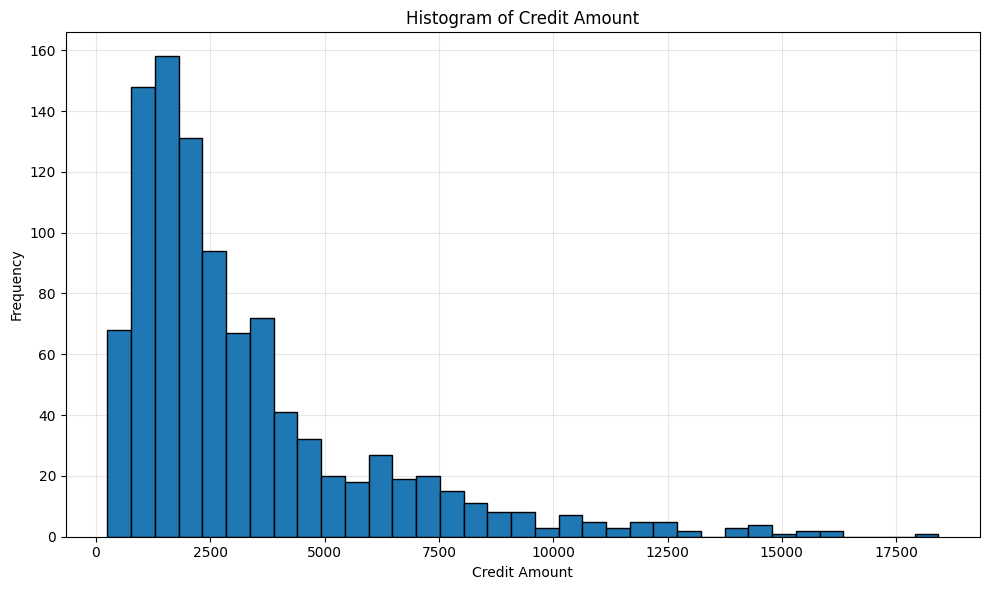

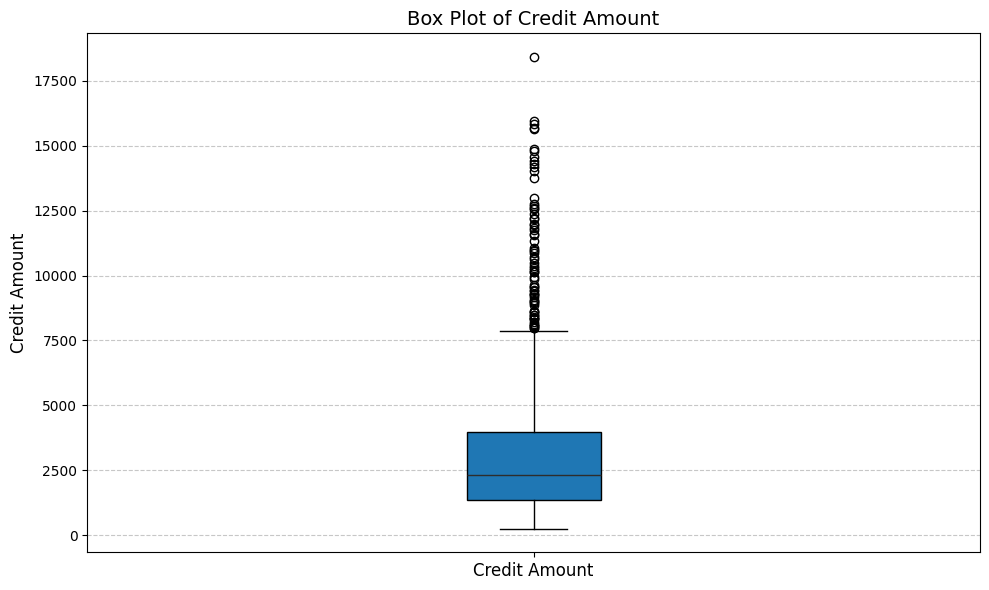

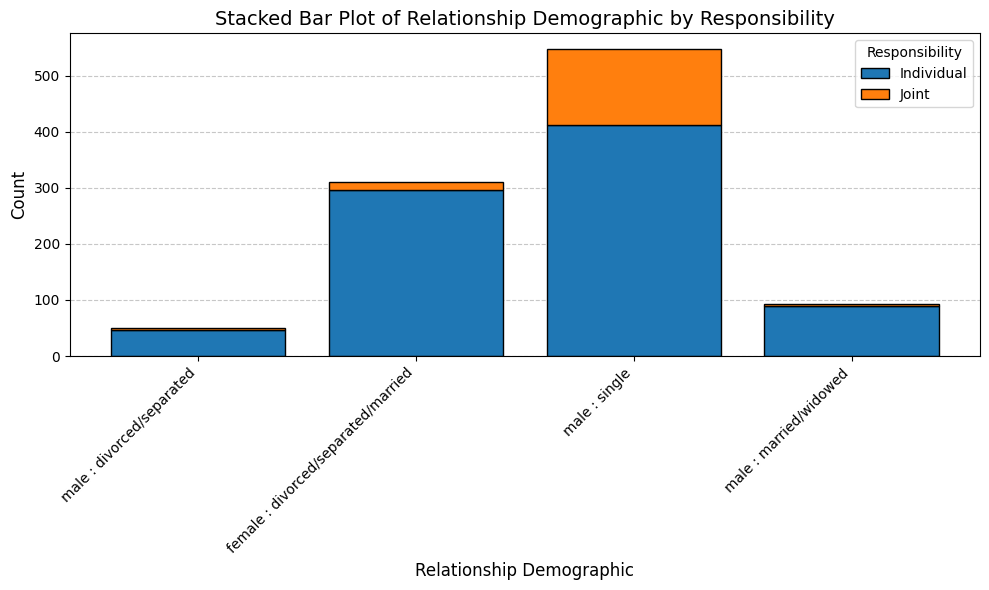

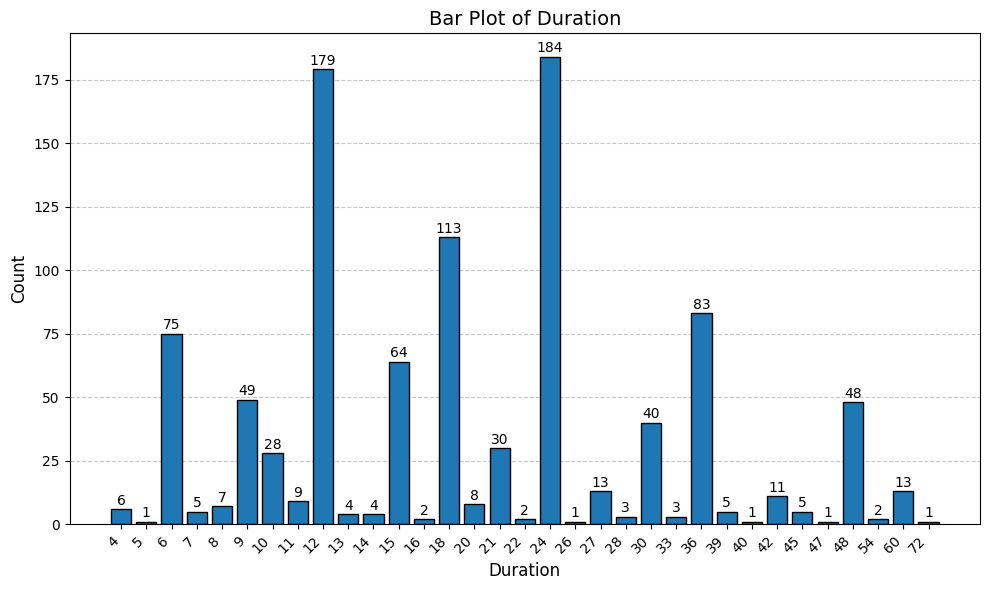

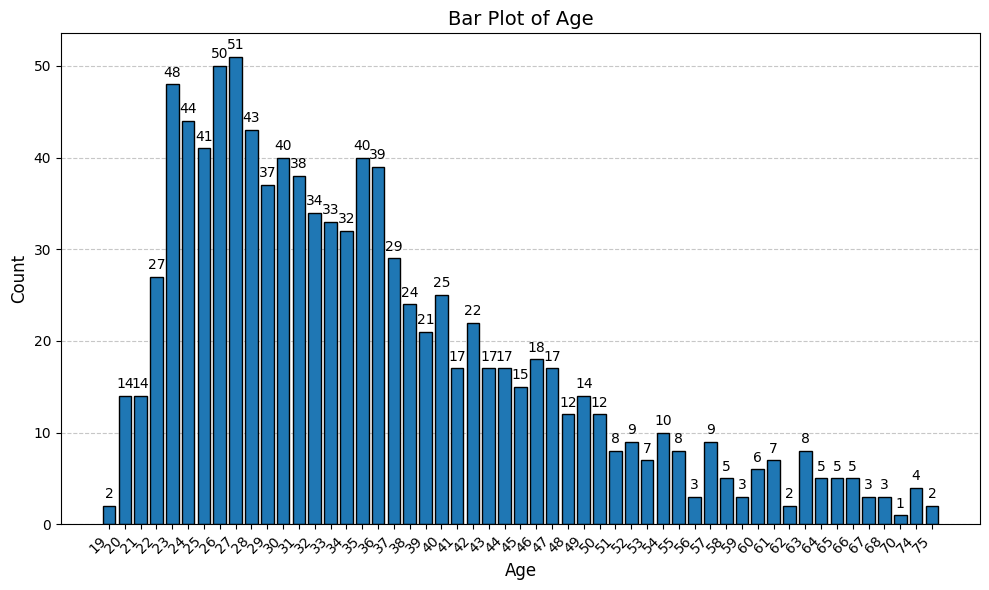

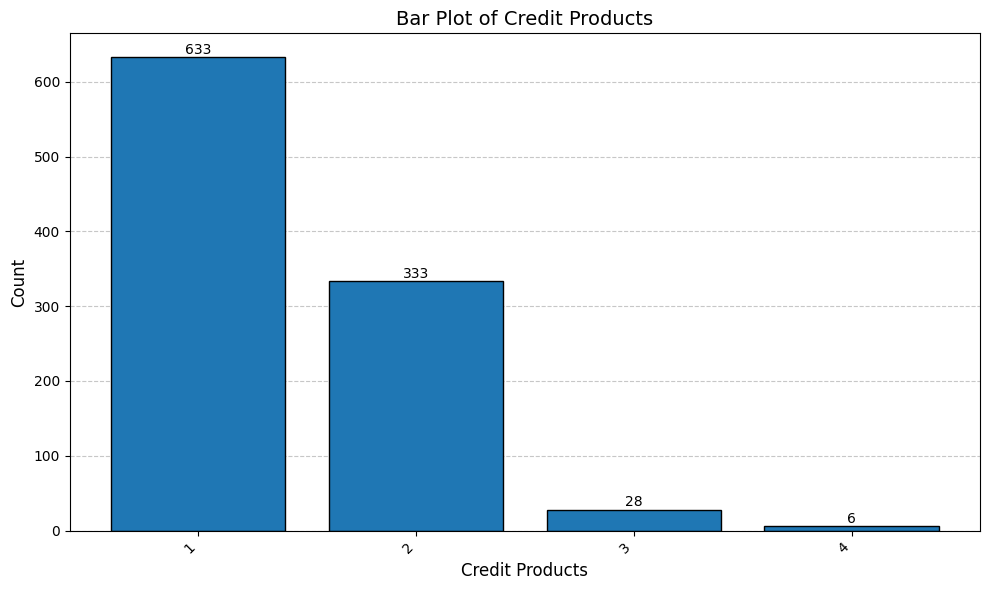

In [34]:
# plot histogram of continuous variable Credit Amount
fig = plot_histogram(df, 'Credit Amount')
plt.show()

# plot boxplot of continuous variable Credit Amount
fig = plot_box(df, 'Credit Amount')
plt.show()

# plot stacked bar chart for Relationship Status and Responsibility
fig = plot_stacked_bar(df, 'Relationship Status', 'Responsibility')
plt.show()

# plot bar plot for numerical variable Credit Products
plot_multiple_bars(df, discrete_columns)

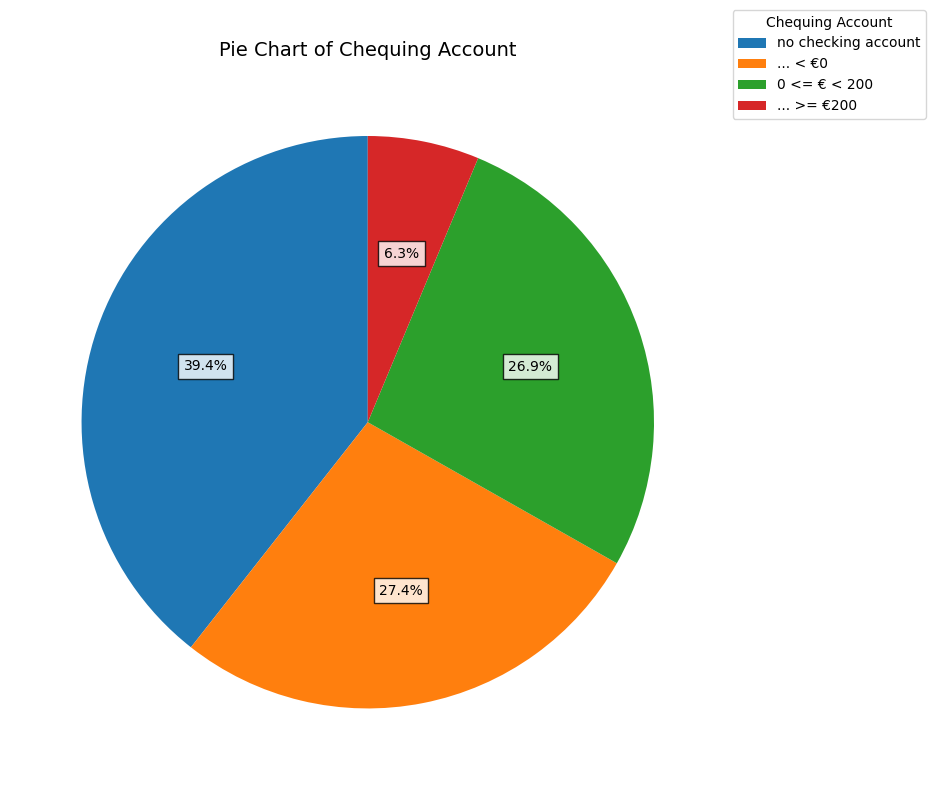

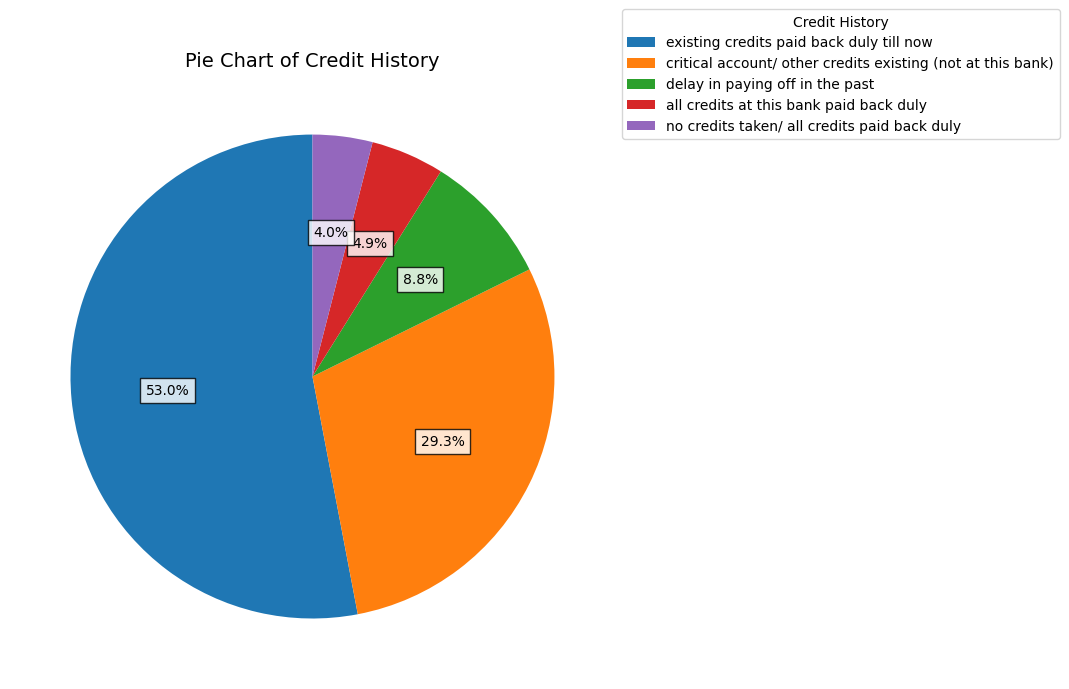

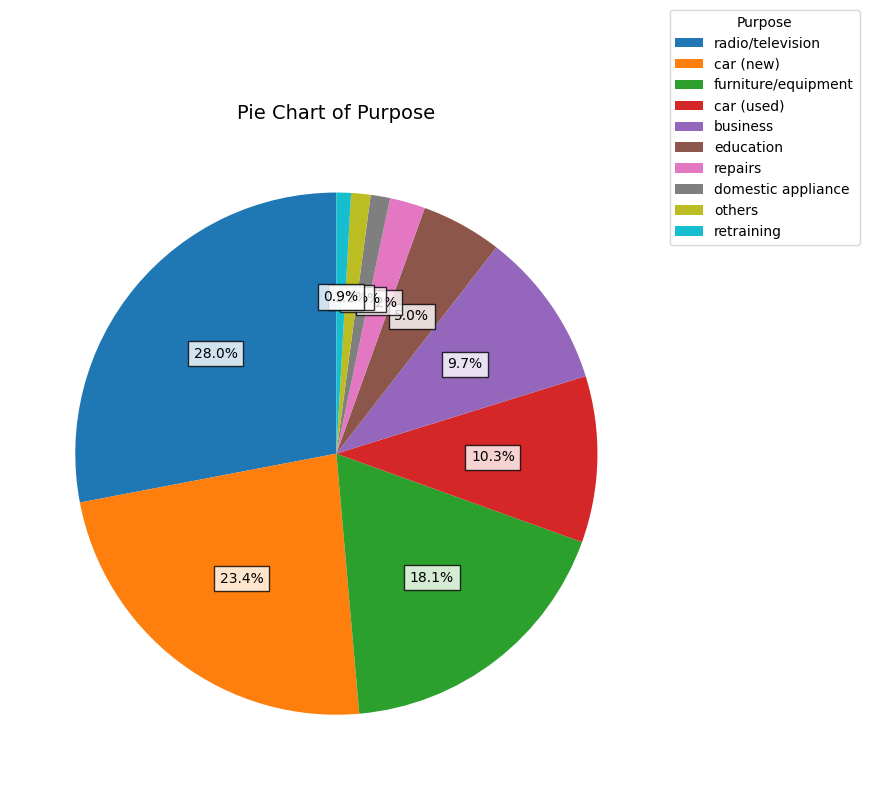

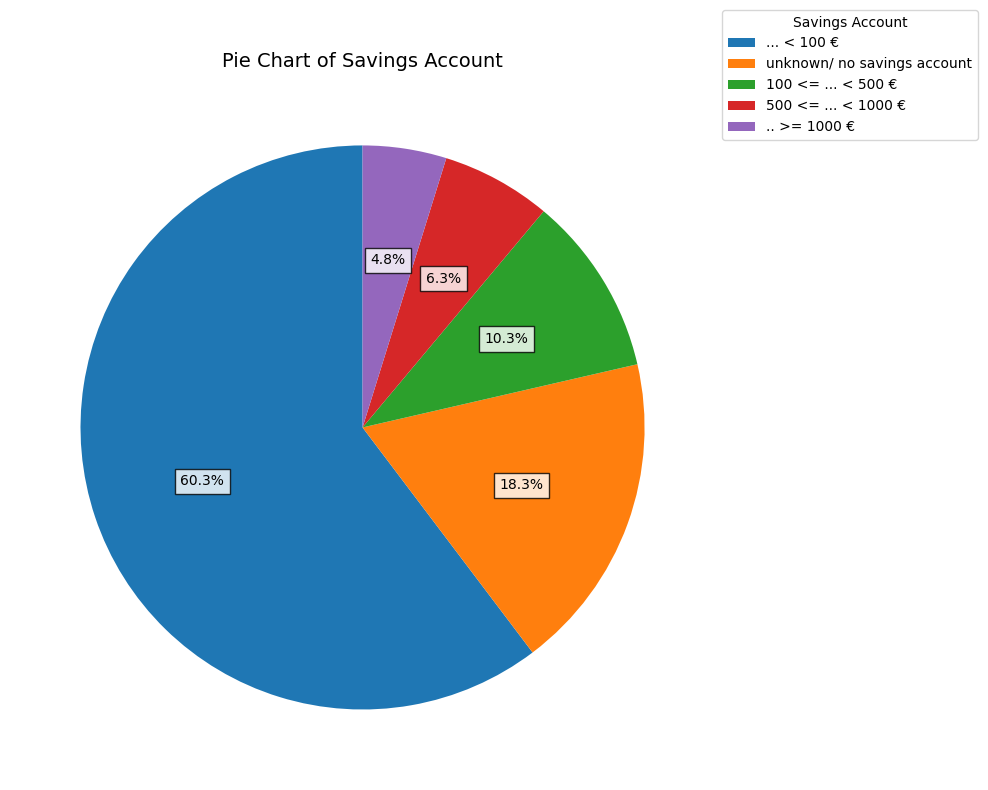

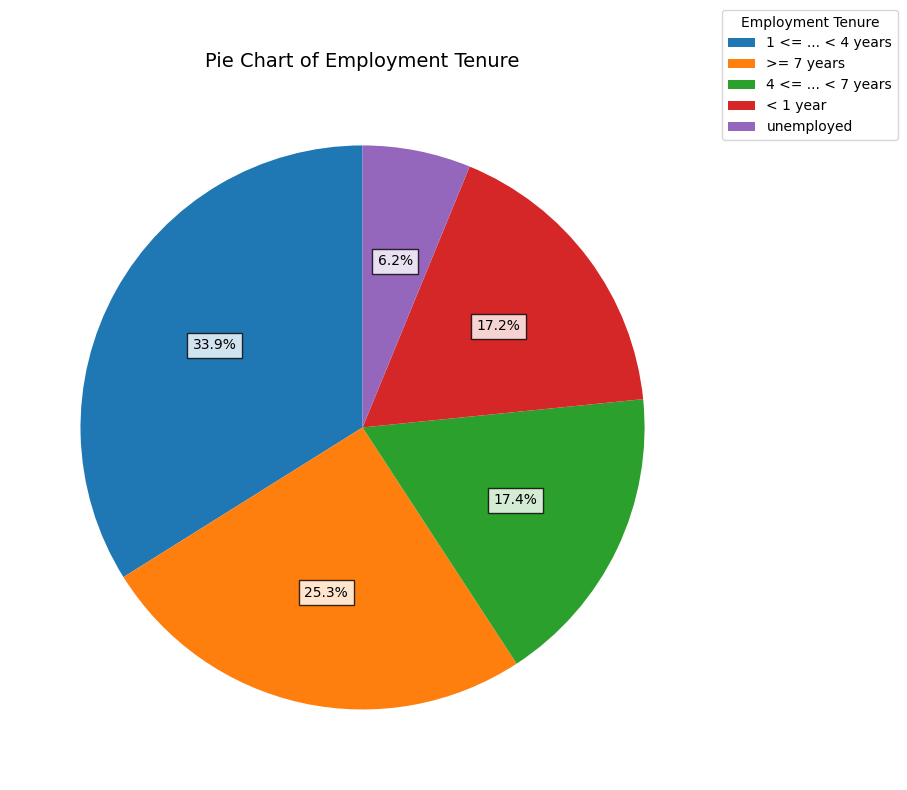

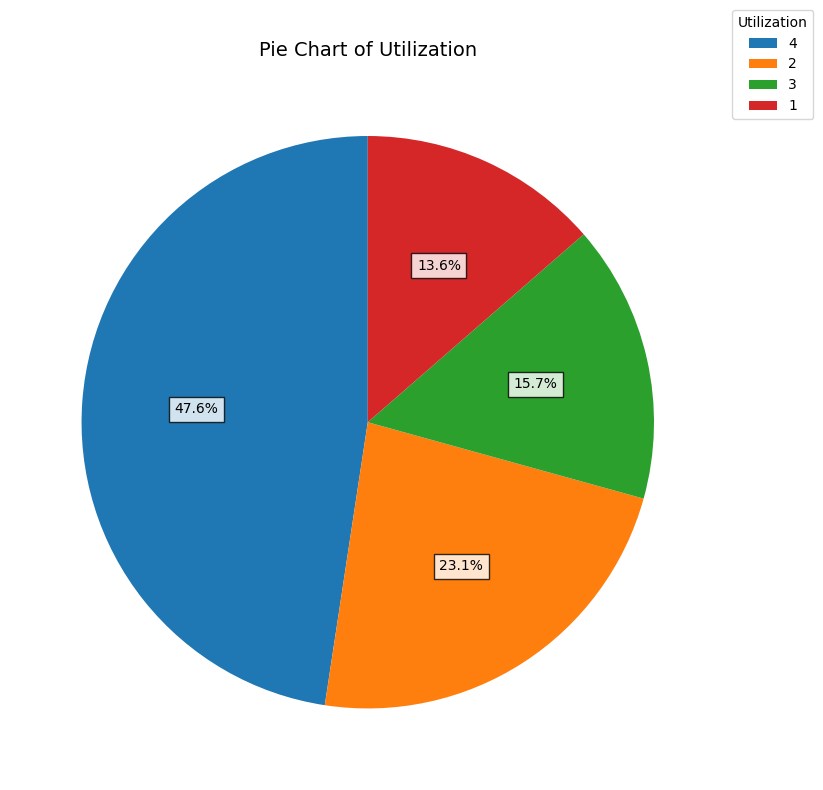

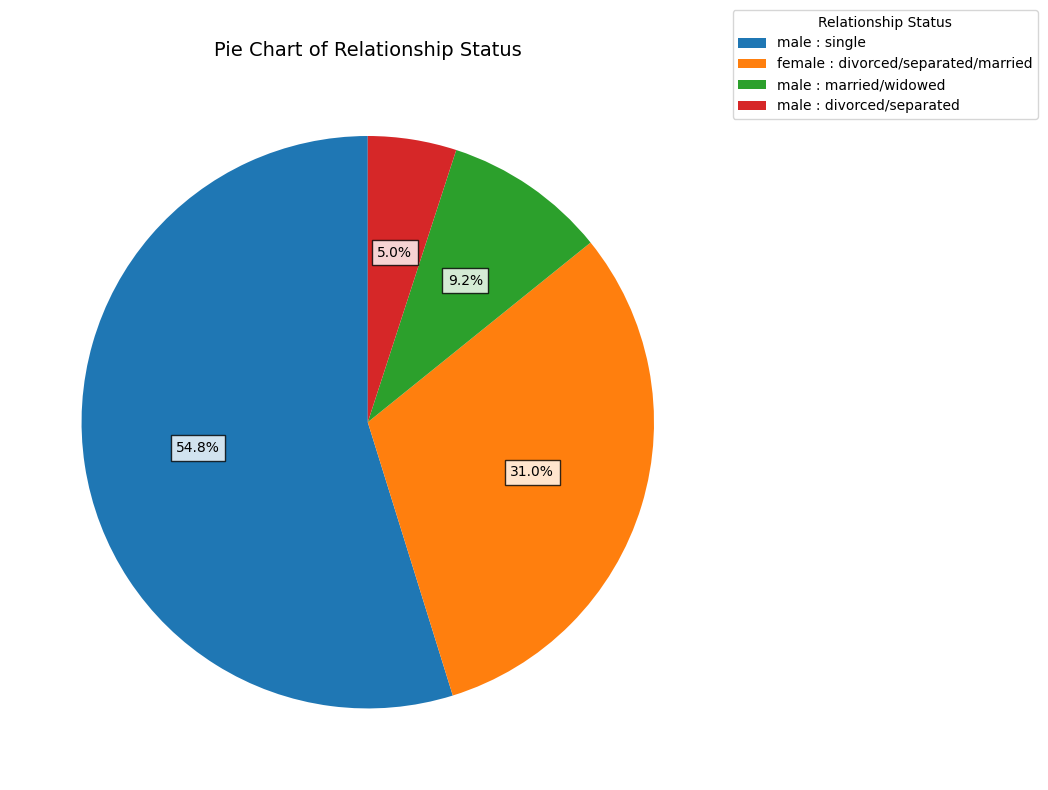

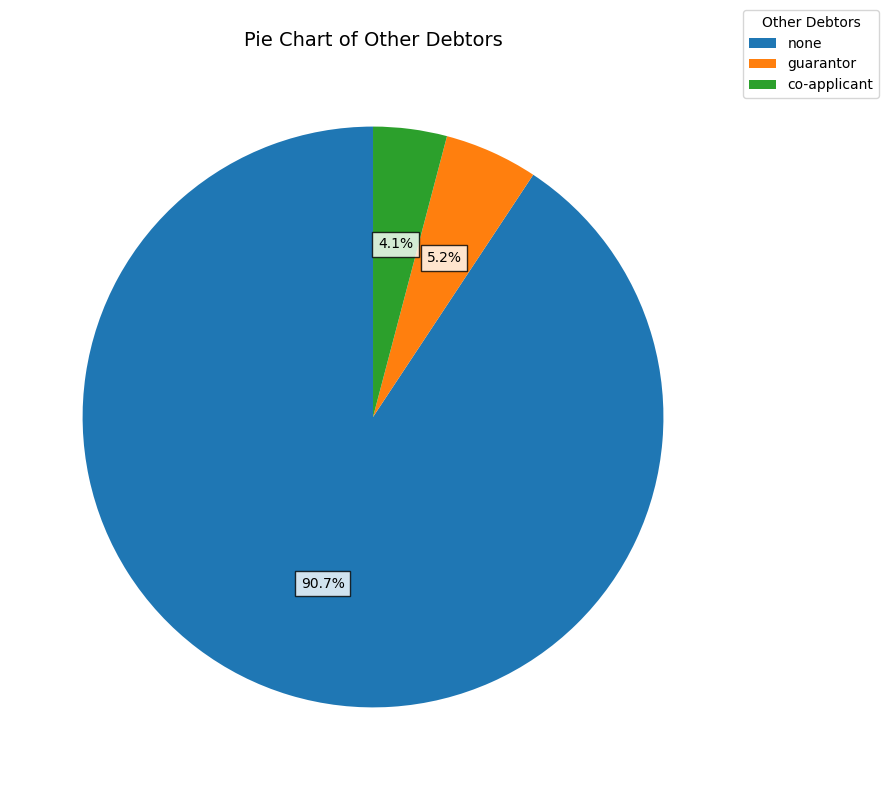

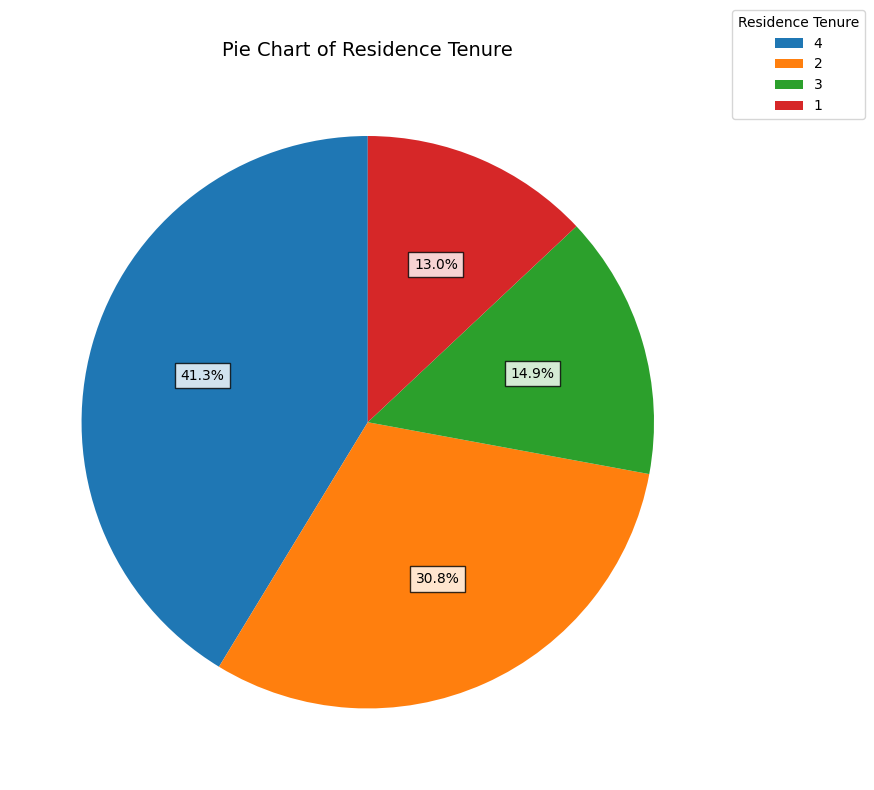

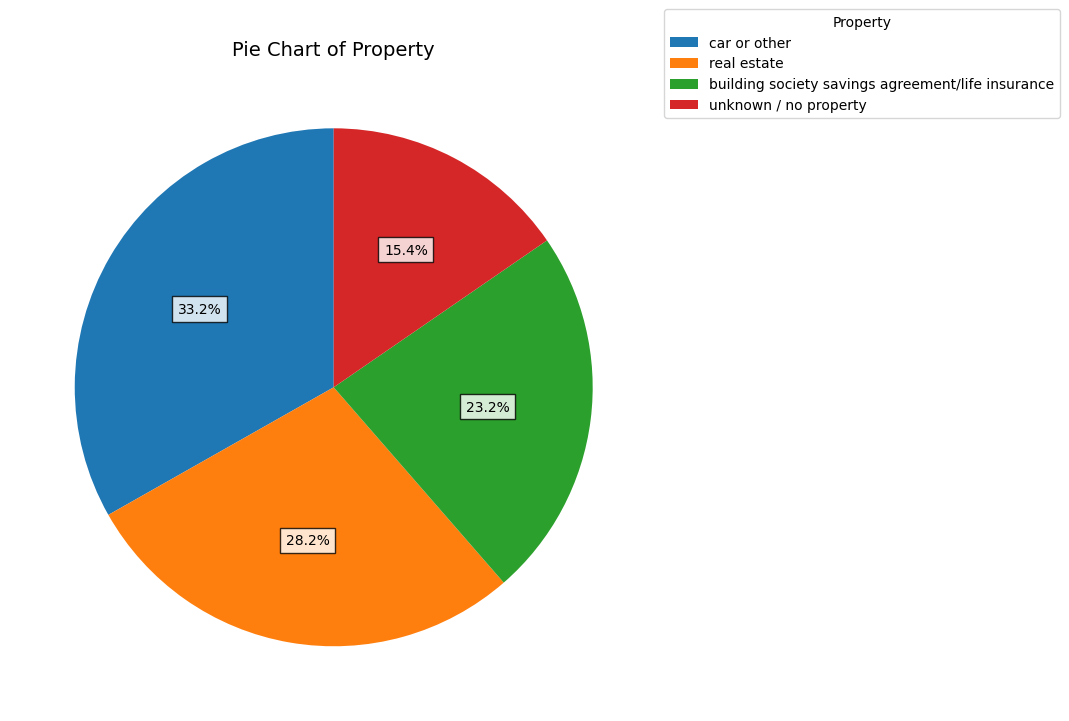

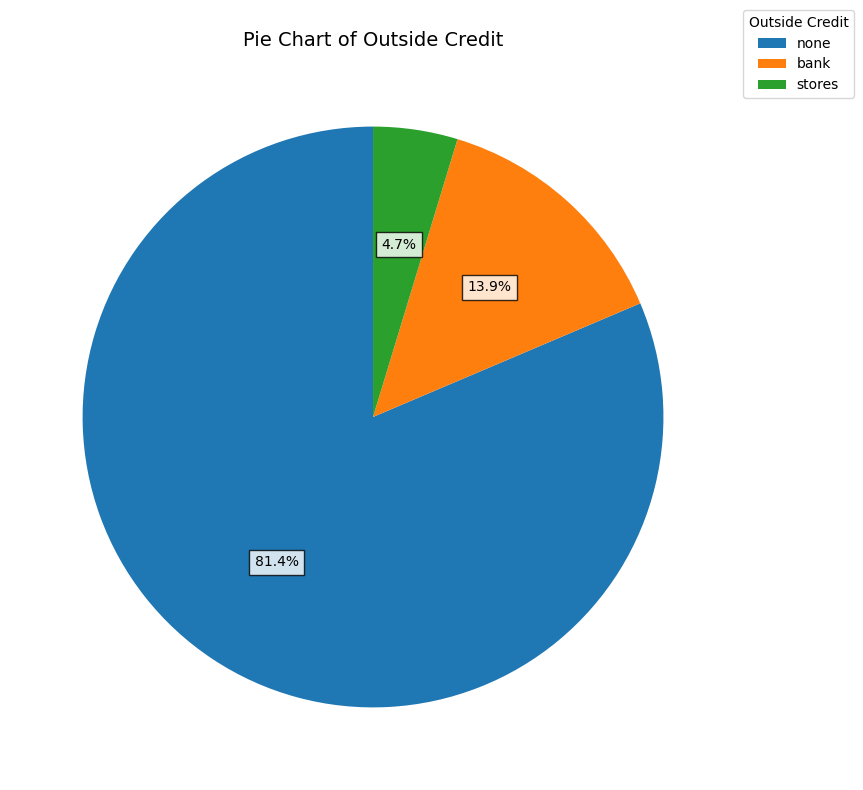

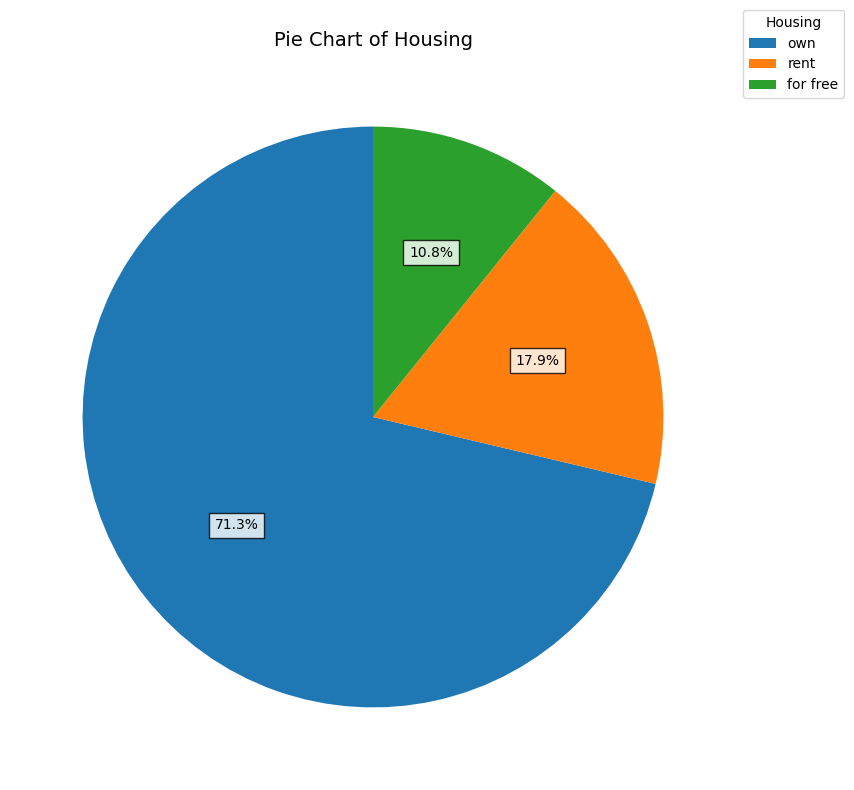

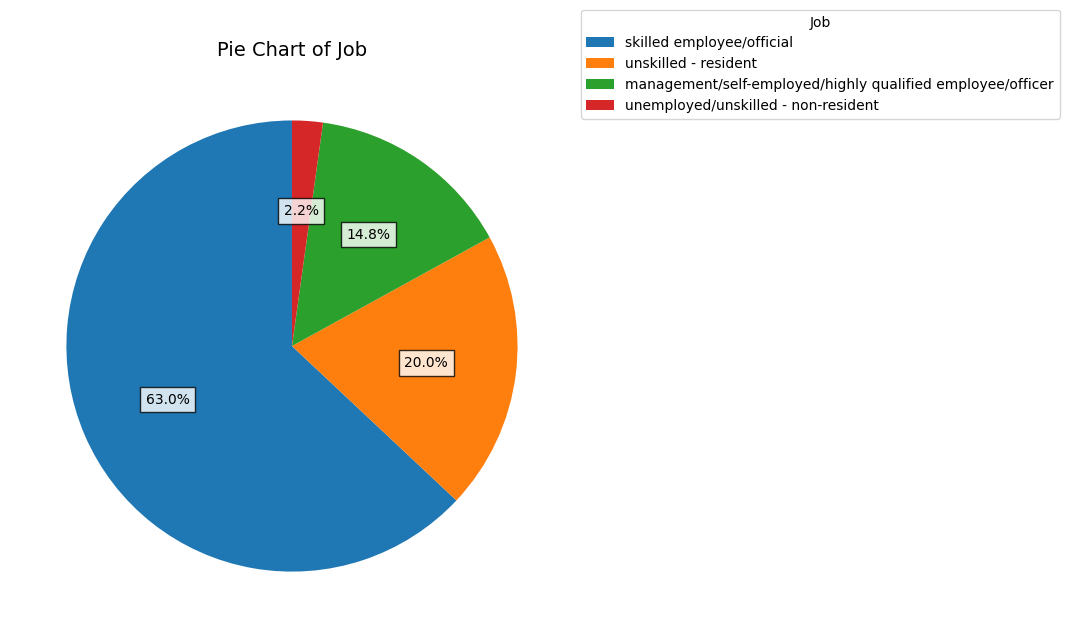

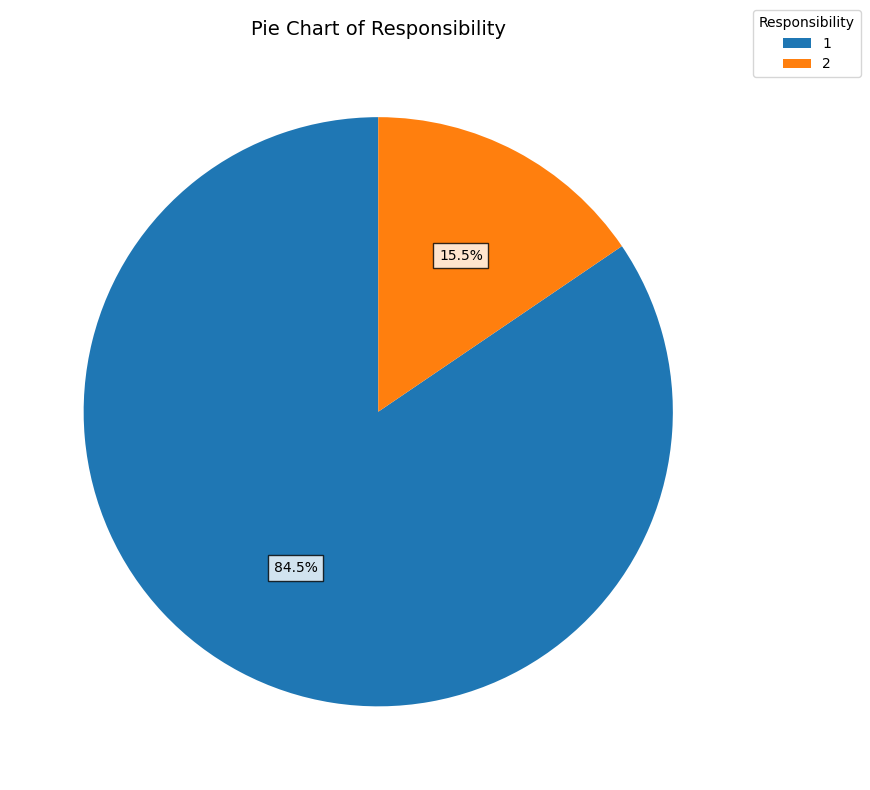

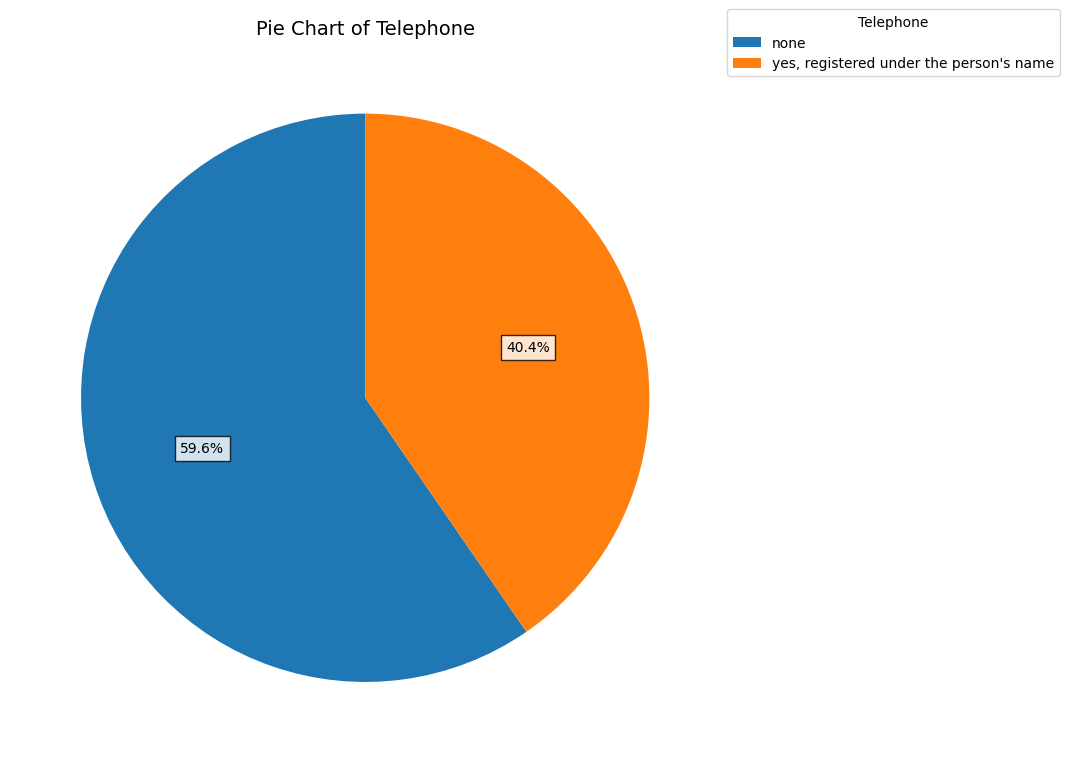

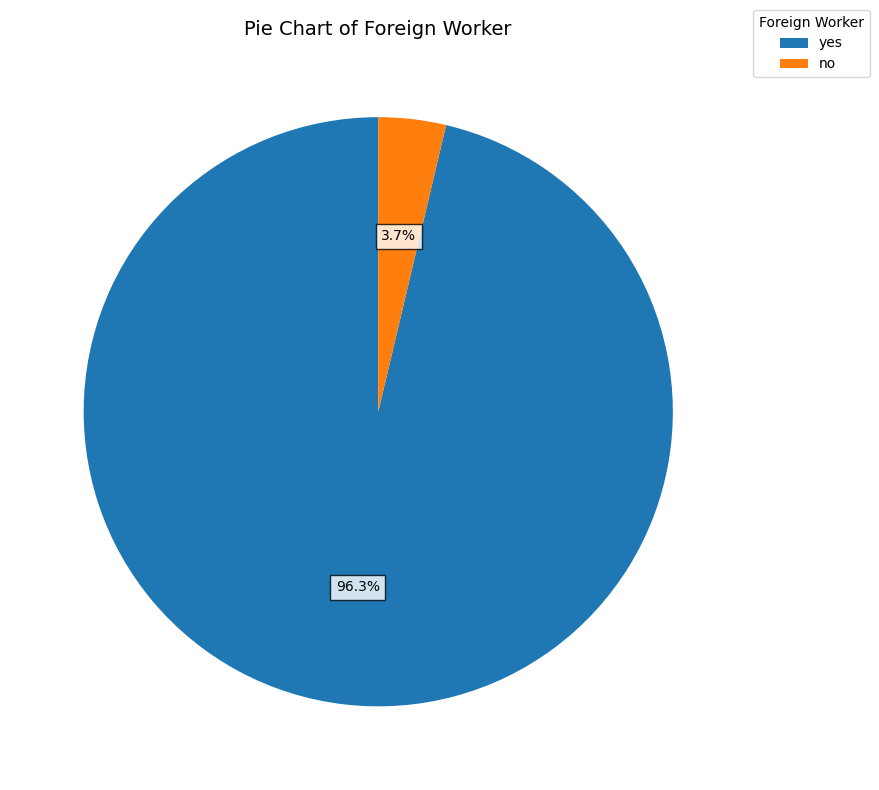

In [37]:
# pie plot for categorical attributes
plot_multiple_pies(df, categorical_columns)